## drive mount & dataset open



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install polars

In [ ]:
import polars as pl
import pandas as pd

In [ ]:
review_df = pl.read_ndjson("/content/drive/MyDrive/ASAC 5기/woowahan/dataset/yelp_academic_dataset_review.json")

In [ ]:
user_df = pl.read_ndjson("/content/drive/MyDrive/ASAC 5기/woowahan/dataset/yelp_academic_dataset_user.json")

In [ ]:
biz_df = pl.read_ndjson("/content/drive/MyDrive/ASAC 5기/woowahan/dataset/yelp_academic_dataset_business.json")

In [ ]:
tip_df = pl.read_ndjson("/content/drive/MyDrive/ASAC 5기/woowahan/dataset/yelp_academic_dataset_tip.json")

In [ ]:
checkin_df = pl.read_ndjson("/content/drive/MyDrive/ASAC 5기/woowahan/dataset/yelp_academic_dataset_checkin.json")

## review df

In [ ]:
review_df.head()

review_id,user_id,business_id,stars,useful,funny,cool,text,date
str,str,str,f64,i64,i64,i64,str,str
"""KU_O5udG6zpxOg…","""mh_-eMZ6K5RLWh…","""XQfwVwDr-v0ZS3…",3.0,0,0,0,"""If you decide …","""2018-07-07 22:…"
"""BiTunyQ73aT9WB…","""OyoGAe7OKpv6Sy…","""7ATYjTIgM3jUlt…",5.0,1,0,1,"""I've taken a l…","""2012-01-03 15:…"
"""saUsX_uimxRlCV…","""8g_iMtfSiwikVn…","""YjUWPpI6HXG530…",3.0,0,0,0,"""Family diner. …","""2014-02-05 20:…"
"""AqPFMleE6RsU23…","""_7bHUi9Uuf5__H…","""kxX2SOes4o-D3Z…",5.0,1,0,1,"""Wow! Yummy, d…","""2015-01-04 00:…"
"""Sx8TMOWLNuJBWe…","""bcjbaE6dDog4jk…","""e4Vwtrqf-wpJfw…",4.0,1,0,1,"""Cute interior …","""2017-01-14 20:…"


In [ ]:
review_df.shape

(6990280, 9)

In [ ]:
review_df = review_df.to_pandas()

In [ ]:
review_sample_df = review_df.sample(n=700000, random_state=42, replace = True)
print(review_sample_df.shape)
review_sample_df

(700000, 9)


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
6413414,uA4z3VILi_g2lfY7bdBYIA,Pbj2wcGMJ-3s6E0bdnx8aQ,tSRICEpYkNZyeCyHYMsM7w,5.0,1,0,0,"Joey has been cutting my hair for years, does ...",2016-02-26 19:51:20
6962611,mdlCRQChrdhE87TPq8y-tw,rpTVjnG1qz403EYYsAlm2Q,VbzoVWEPSfzaIGBq4KlVwQ,4.0,0,0,0,i just discovered this place and have been com...,2021-11-12 13:59:50
6423388,bvy3W0AGzGJxxhWzOS7v-w,z1yqatRh9eSo1Xl99w3SjQ,-1B9pP_CrRBJYPICE5WbRA,3.0,0,0,0,"Went to Spyce 28 for dinner this past Sunday, ...",2018-06-13 17:57:58
6550634,t4qvPLAF5Yjs3KfoFlbMGA,O6uORP9Q_AYHomJBPWxIMA,hvp1huVLVB7reZZKeXvhpg,4.0,0,0,0,Its a BYOB Tiki Bar. I can't wait to return wi...,2014-06-03 03:02:57
1692743,wLI8dgnvYlx4EjVcHV0fGg,DYJ2s7mvC2xHWVqzmraNlQ,I7SkoqN88fpKagzKA059Fw,5.0,0,0,0,This my second visit to First Watch. I have n...,2017-12-23 15:43:23
...,...,...,...,...,...,...,...,...,...
4005255,SFH62-ANIwsi577i2JehMA,Z9w_0w_1y11pvkpamn0_vQ,lEYYvlWPgMrO_yplaWzrhg,5.0,1,0,0,We came here for a birthday and all of us were...,2020-07-08 17:08:02
3989442,LQ7YvqaiVknZ_qyTYgcn2Q,v_vzBJwzw-QxZzH4t_52TA,CWM-nSxoqOXn7MaTJGK4VA,1.0,5,3,0,The cans sat out for a week and when I called ...,2014-06-09 00:21:09
329980,TVjDyTPRVBsJv5tfTx6ECQ,sXhL_frhWM8CpkmWNXXIVA,2W0P6hXCbE6EgP5R6y9eBw,2.0,0,0,0,Came in on a lunch business meeting on a Frida...,2016-03-25 16:40:22
4060054,i4SA49wir7bIhyGKa7A0SQ,bNovrNyILTE15nUKcw362A,yqU-NNwdERrS7XbUm-t7kg,1.0,2,0,0,Our toilet was leaking around the base. Matt'...,2020-02-07 00:56:47


In [ ]:
review_sample_df

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
6413414,uA4z3VILi_g2lfY7bdBYIA,Pbj2wcGMJ-3s6E0bdnx8aQ,tSRICEpYkNZyeCyHYMsM7w,5.0,1,0,0,"Joey has been cutting my hair for years, does ...",2016-02-26 19:51:20
6962611,mdlCRQChrdhE87TPq8y-tw,rpTVjnG1qz403EYYsAlm2Q,VbzoVWEPSfzaIGBq4KlVwQ,4.0,0,0,0,i just discovered this place and have been com...,2021-11-12 13:59:50
6423388,bvy3W0AGzGJxxhWzOS7v-w,z1yqatRh9eSo1Xl99w3SjQ,-1B9pP_CrRBJYPICE5WbRA,3.0,0,0,0,"Went to Spyce 28 for dinner this past Sunday, ...",2018-06-13 17:57:58
6550634,t4qvPLAF5Yjs3KfoFlbMGA,O6uORP9Q_AYHomJBPWxIMA,hvp1huVLVB7reZZKeXvhpg,4.0,0,0,0,Its a BYOB Tiki Bar. I can't wait to return wi...,2014-06-03 03:02:57
1692743,wLI8dgnvYlx4EjVcHV0fGg,DYJ2s7mvC2xHWVqzmraNlQ,I7SkoqN88fpKagzKA059Fw,5.0,0,0,0,This my second visit to First Watch. I have n...,2017-12-23 15:43:23
...,...,...,...,...,...,...,...,...,...
4005255,SFH62-ANIwsi577i2JehMA,Z9w_0w_1y11pvkpamn0_vQ,lEYYvlWPgMrO_yplaWzrhg,5.0,1,0,0,We came here for a birthday and all of us were...,2020-07-08 17:08:02
3989442,LQ7YvqaiVknZ_qyTYgcn2Q,v_vzBJwzw-QxZzH4t_52TA,CWM-nSxoqOXn7MaTJGK4VA,1.0,5,3,0,The cans sat out for a week and when I called ...,2014-06-09 00:21:09
329980,TVjDyTPRVBsJv5tfTx6ECQ,sXhL_frhWM8CpkmWNXXIVA,2W0P6hXCbE6EgP5R6y9eBw,2.0,0,0,0,Came in on a lunch business meeting on a Frida...,2016-03-25 16:40:22
4060054,i4SA49wir7bIhyGKa7A0SQ,bNovrNyILTE15nUKcw362A,yqU-NNwdERrS7XbUm-t7kg,1.0,2,0,0,Our toilet was leaking around the base. Matt'...,2020-02-07 00:56:47


### langdetect

In [ ]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993227 sha256=0e9c9623bc2b1f2c30d86d72d0d02f888cda9818dcf3068d7d68ff002b583990
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [ ]:
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException

# LangDetect가 항상 동일한 결과를 반환하도록 설정
DetectorFactory.seed = 0

# 언어 감지 함수 정의
def detect_language(text):
    try:
        return detect(text)
    except LangDetectException:
        return "unknown"

In [ ]:
review_10sample_df = review_df.sample(n=100, random_state = 100000)
review_10sample_df

AttributeError: 'Index' object has no attribute '_format_flat'

                      review_id                 user_id  \
6767907  YUpBY-HcndvGgy6371OeQQ  FBWkscr1BVNANlgODRLAyg   
976368   NWuxieX7wrpFsB50uoP_Tg  JM9k03N5rxS9pCRSlzEAOw   
2524076  6WHqJcUSW3Tzn4R-6I4kyw  W4vwwkKITtZ_PT-ZFFw9Sw   
869248   TPeDWqSANVUjEYZ_p00TNw  8Bv0s0vGap0GFkIM7CUFkA   
1720810  NtqozuLm5W7r3wwAl99RhQ  Od2Ev0b92eKrciDJIRVNpQ   
...                         ...                     ...   
5022994  HyxNT5c2sDoeY6Ls-Q0cow  YZ-7kibmxO5bBQfqGsGtdQ   
532623   MYoxncuxGi16L3yQeUg0wA  YKto7WZS5LfOIGf8kXcJEw   
3313972  LcoEGc9RRbFqOjgQx4KnKg  qa7ldWGOOM08iph7RcjgmA   
1540483  hdeA3IABVkXz__7q0r3DSw  nFYYrACfDHlVW4Wv1uK-nQ   
2638833  KDJQ8WSgdfMyta2dtl0zRg  KrqfLGL8FiJvJwPSTAsN-w   

                    business_id  stars  useful  funny  cool  \
6767907  bdteJqgoj0OaALhj9RFtmw    4.0       0      0     0   
976368   kowjqBtDYJ71WINgxjWauw    4.0       0      0     0   
2524076  iFgoIM21C_P68N8Dk-HHEA    3.0       0      0     0   
869248   XL-eaN5Mwq0Hu1KgaZ88fA    4.0 

In [ ]:
# 언어 컬럼 추가
uppercase_rows['language'] = uppercase_rows['text'].apply(detect_language)

# 결과 출력
uppercase_rows

NameError: name 'uppercase_rows' is not defined

In [ ]:
uppercase_rows['language'].value_counts()

### col text : upper letter 확인


### INSIGHT #1

💡가설 1. (영어권) 모두 대문자인 경우 "매우" 좋거나 "매우" 나쁘거나


🚨어떤 언어인지 파악할 것.

In [ ]:
# text 컬럼이 모두 대문자인 행만 필터링
uppercase_rows = review_df[review_df['text'].apply(lambda x: x.isupper())]

uppercase_rows.shape

## user df

In [ ]:
user_df

user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
str,str,i64,str,i64,i64,i64,str,str,i64,f64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
"""qVc8ODYU5SZjKX…","""Walker""",585,"""2007-01-25 16:…",7217,1259,5994,"""2007""","""NSCy54eWehBJyZ…",267,3.91,250,65,55,56,18,232,844,467,467,239,180
"""j14WgRoU_-2ZE1…","""Daniel""",4333,"""2009-01-25 04:…",43091,13066,27281,"""2009,2010,2011…","""ueRPE0CX75ePGM…",3138,3.74,1145,264,184,157,251,1847,7054,3131,3131,1521,1946
"""2WnXYQFK0hXEoT…","""Steph""",665,"""2008-07-25 10:…",2086,1010,1003,"""2009,2010,2011…","""LuO3Bn4f3rlhyH…",52,3.32,89,13,10,17,3,66,96,119,119,35,18
"""SZDeASXq7o05mM…","""Gwen""",224,"""2005-11-29 04:…",512,330,299,"""2009,2010,2011…","""enx1vVPnfdNUdP…",28,4.27,24,4,1,6,2,12,16,26,26,10,9
"""hA5lMy-EnncsH4…","""Karen""",79,"""2007-01-05 19:…",29,15,7,"""""","""PBK4q9KEEBHhFv…",1,3.54,1,1,0,0,0,1,1,0,0,0,0
"""q_QQ5kBBwlCcbL…","""Jane""",1221,"""2005-03-14 20:…",14953,9940,11211,"""2006,2007,2008…","""xBDpTUbai0DXrv…",1357,3.85,1713,163,191,361,147,1212,5696,2543,2543,815,323
"""cxuxXkcihfCbqt…","""Rob""",12,"""2009-02-24 03:…",6,1,0,"""""","""HDAQ74AEznP-Ys…",1,2.75,0,0,0,0,0,0,1,0,0,0,0
"""E9kcWJdJUHuTKf…","""Mike""",358,"""2008-12-11 22:…",399,102,143,"""""","""y2GyxJF5VQWohx…",23,3.73,4,7,2,0,0,8,6,12,12,5,0
"""lO1iq-f75hnPNZ…","""Rachelle""",40,"""2008-12-29 22:…",109,40,46,"""""","""tOQDlz36rI__SO…",7,4.04,2,0,0,3,0,3,4,5,5,3,1


In [ ]:
user_df=user_df.to_pandas()

###user df join review

In [ ]:
# user_id를 기준으로 review_sample_df와 user_df를 조인
merged_user_rev_df = pd.merge(review_sample_df, user_df, on='user_id', how='inner')

# 결과 확인
merged_user_rev_df

,review_id,user_id,business_id,stars,useful_x,funny_x,cool_x,text,date,name,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,uA4z3VILi_g2lfY7bdBYIA,Pbj2wcGMJ-3s6E0bdnx8aQ,tSRICEpYkNZyeCyHYMsM7w,5.0,1,0,0,"Joey has been cutting my hair for years, does ...",2016-02-26 19:51:20,Paul,...,0,0,0,0,0,0,0,0,0,0
1,mdlCRQChrdhE87TPq8y-tw,rpTVjnG1qz403EYYsAlm2Q,VbzoVWEPSfzaIGBq4KlVwQ,4.0,0,0,0,i just discovered this place and have been com...,2021-11-12 13:59:50,Kyla,...,0,0,0,0,2,0,0,0,0,0
2,bvy3W0AGzGJxxhWzOS7v-w,z1yqatRh9eSo1Xl99w3SjQ,-1B9pP_CrRBJYPICE5WbRA,3.0,0,0,0,"Went to Spyce 28 for dinner this past Sunday, ...",2018-06-13 17:57:58,Kenneth,...,0,0,0,0,2,1,0,0,0,0
3,t4qvPLAF5Yjs3KfoFlbMGA,O6uORP9Q_AYHomJBPWxIMA,hvp1huVLVB7reZZKeXvhpg,4.0,0,0,0,Its a BYOB Tiki Bar. I can't wait to return wi...,2014-06-03 03:02:57,Grant,...,2,1,0,0,7,7,11,11,12,0
4,wLI8dgnvYlx4EjVcHV0fGg,DYJ2s7mvC2xHWVqzmraNlQ,I7SkoqN88fpKagzKA059Fw,5.0,0,0,0,This my second visit to First Watch. I have n...,2017-12-23 15:43:23,James,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699991,ofx2-aUdsk2dvmUnef6WBA,gp2FQFazflWPiiV1-hhiKg,zocN9lTOMnIxninWP6MGlw,1.0,4,2,1,I was heading North out of Reno when I decided...,2014-12-30 17:54:00,Thomas,...,0,0,0,0,0,0,0,0,0,0
699992,oD6taHliVLZP6PCJE6WctQ,FTYVoVtZDtBZdTDP71ngtg,GROg6x3Lf-Tp3TgiTtYsoA,1.0,2,1,0,This place is the worse!!! Me and my party had...,2011-04-07 14:28:59,Comedian,...,1,0,0,0,0,0,0,0,0,0
699993,FxRIHilSKxCQRQSyShKxOg,5uMaokCybJHQRalNpyJpIA,imCIha88DmlxaWpXScRkZw,1.0,0,0,0,ordered chips & salsa and got all BROKEN chips...,2019-07-03 03:35:26,Brittany,...,0,0,0,0,0,0,0,0,0,0
699994,jbP46CHaf0DgDF5Ip0bFug,0n9ZD5SuCF4RhZZ0cLkM-Q,fUUWNXN9eL2ZP2-ZaJr-Tg,2.0,1,0,0,"We come from Florida and stopped in Franklin, ...",2021-08-03 13:23:17,Nina,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
merged_user_rev_df['user_id'].value_counts()

user_id
_BcWyKQL16ndpBdggh2kNA    289
Xw7ZjaGfr0WNVt6s_5KZfA    188
0Igx-a1wAstiBDerGxXk2A    186
-G7Zkl1wIWBBmD0KRy_sCw    179
1HM81n6n4iPIFU5d2Lokhw    174
                         ... 
h6TPsBVe8kUXZoCTYI38Sw      1
hwyXhpZiv7QPBizqS4O5og      1
D1hLgBv9WkVxZEI4ij2wGA      1
Q6Ivdk1tydh1F2dIWrceOw      1
Z9w_0w_1y11pvkpamn0_vQ      1
Name: count, Length: 410928, dtype: int64

## biz df

In [ ]:
biz_df

business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
str,str,str,str,str,str,f64,f64,f64,i64,i64,str,str,str
"""Pns2l4eNsfO8kk…","""Abby Rappoport…","""1616 Chapala S…","""Santa Barbara""","""CA""","""93101""",34.426679,-119.711197,5.0,7,0,null,"""Doctors, Tradi…",null
"""mpf3x-BjTdTEA3…","""The UPS Store""","""87 Grasso Plaz…","""Affton""","""MO""","""63123""",38.551126,-90.335695,3.0,15,1,null,"""Shipping Cente…",null
"""tUFrWirKiKi_TA…","""Target""","""5255 E Broadwa…","""Tucson""","""AZ""","""85711""",32.223236,-110.880452,3.5,22,0,null,"""Department Sto…",null
"""MTSW4McQd7CbVt…","""St Honore Past…","""935 Race St""","""Philadelphia""","""PA""","""19107""",39.955505,-75.155564,4.0,80,1,null,"""Restaurants, F…",null
"""mWMc6_wTdE0EUB…","""Perkiomen Vall…","""101 Walnut St""","""Green Lane""","""PA""","""18054""",40.338183,-75.471659,4.5,13,1,null,"""Brewpubs, Brew…",null
"""CF33F8-E6oudUQ…","""Sonic Drive-In…","""615 S Main St""","""Ashland City""","""TN""","""37015""",36.269593,-87.058943,2.0,6,1,null,"""Burgers, Fast …",null
"""n_0UpQx1hsNbnP…","""Famous Footwea…","""8522 Eager Roa…","""Brentwood""","""MO""","""63144""",38.627695,-90.340465,2.5,13,1,null,"""Sporting Goods…",null
"""qkRM_2X51Yqxk3…","""Temple Beth-El…","""400 Pasadena A…","""St. Petersburg…","""FL""","""33707""",27.76659,-82.732983,3.5,5,1,null,"""Synagogues, Re…",null
"""k0hlBqXX-Bt0vf…","""Tsevi's Pub An…","""8025 Mackenzie…","""Affton""","""MO""","""63123""",38.565165,-90.321087,3.0,19,0,null,"""Pubs, Restaura…",null


In [ ]:
biz_df = biz_df.to_pandas()

In [ ]:
biz_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       150346 non-null  object 
 3   city          150346 non-null  object 
 4   state         150346 non-null  object 
 5   postal_code   150346 non-null  object 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  int64  
 10  is_open       150346 non-null  int64  
 11  attributes    0 non-null       object 
 12  categories    150243 non-null  object 
 13  hours         0 non-null       object 
dtypes: float64(3), int64(2), object(9)
memory usage: 16.1+ MB


In [ ]:
biz_df['categories'].nunique()

83160

In [ ]:
# 특정 열 선택
biz_df_pick = biz_df[['business_id', 'categories', 'stars']]

# 'stars' 컬럼명을 'stars_biz'로 변경
biz_df_pick.rename(columns={'stars': 'stars_biz'}, inplace=True)

<ipython-input-75-5673545b9f75>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biz_df_pick.rename(columns={'stars': 'stars_biz'}, inplace=True)


In [ ]:
biz_df_pick

,business_id,categories,stars_biz
0,Pns2l4eNsfO8kk83dixA6A,"Doctors, Traditional Chinese Medicine, Naturop...",5.0
1,mpf3x-BjTdTEA3yCZrAYPw,"Shipping Centers, Local Services, Notaries, Ma...",3.0
2,tUFrWirKiKi_TAnsVWINQQ,"Department Stores, Shopping, Fashion, Home & G...",3.5
3,MTSW4McQd7CbVtyjqoe9mw,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",4.0
4,mWMc6_wTdE0EUBKIGXDVfA,"Brewpubs, Breweries, Food",4.5
...,...,...,...
150341,IUQopTMmYQG-qRtBk-8QnA,"Nail Salons, Beauty & Spas",3.0
150342,c8GjPIOTGVmIemT7j5_SyQ,"Pets, Nurseries & Gardening, Pet Stores, Hobby...",4.0
150343,_QAMST-NrQobXduilWEqSw,"Shopping, Jewelry, Piercing, Toy Stores, Beaut...",3.5
150344,mtGm22y5c2UHNXDFAjaPNw,"Fitness/Exercise Equipment, Eyewear & Optician...",4.0


### user df join review join biz


In [ ]:
merged_user_rev_biz_df = pd.merge(merged_user_rev_df, biz_df_pick, on='business_id', how='inner')


In [ ]:
merged_user_rev_biz_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699996 entries, 0 to 699995
Data columns (total 32 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   review_id           699996 non-null  object 
 1   user_id             699996 non-null  object 
 2   business_id         699996 non-null  object 
 3   stars               699996 non-null  float64
 4   useful_x            699996 non-null  int64  
 5   funny_x             699996 non-null  int64  
 6   cool_x              699996 non-null  int64  
 7   text                699996 non-null  object 
 8   date                699996 non-null  object 
 9   name                699996 non-null  object 
 10  review_count        699996 non-null  int64  
 11  yelping_since       699996 non-null  object 
 12  useful_y            699996 non-null  int64  
 13  funny_y             699996 non-null  int64  
 14  cool_y              699996 non-null  int64  
 15  elite               699996 non-nul

In [ ]:
user1_df = merged_user_rev_biz_df[merged_user_rev_biz_df['user_id']=='_BcWyKQL16ndpBdggh2kNA']

In [ ]:
user1_df

,review_id,user_id,business_id,stars,useful_x,funny_x,cool_x,text,date,name,...,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,categories,stars_biz
15299,eT0NdgQmAn_dGx_dYZBAfw,_BcWyKQL16ndpBdggh2kNA,xb5NsCqvQw2uE5HoQyDr0g,4.0,13,4,6,When it's fresh - that vanilla pound cake is s...,2019-12-02 17:55:44,Karen,...,15,35,262,498,394,394,191,36,"Restaurants, Food, Bakeries",4.5
15362,0v4NekYNifpTSpPP55kxPw,_BcWyKQL16ndpBdggh2kNA,DTwt8_pCuGyQbiIfXNdhDw,3.0,1,0,0,"This is a nice, BIG, B&N location complete wit...",2010-01-19 19:53:12,Karen,...,15,35,262,498,394,394,191,36,"Bakeries, Coffee & Tea, Food, Bagels, Sandwich...",3.0
16839,eEWfWv9uli7tswu3L8mJJQ,_BcWyKQL16ndpBdggh2kNA,LklDTDwgJLbUjd67ZKsvCg,4.0,0,0,0,Nice green space - a welcome respite within th...,2008-12-12 20:25:32,Karen,...,15,35,262,498,394,394,191,36,"Active Life, Local Flavor, Parks",4.5
21726,KmU_5uh2WTDVf2k4gtVbmQ,_BcWyKQL16ndpBdggh2kNA,sfOczyUZLffzSOVeVBbJrw,3.0,17,10,10,"I want to give this place higher marks, but I ...",2018-01-16 12:38:48,Karen,...,15,35,262,498,394,394,191,36,"Restaurants, American (New), Nightlife, Bars, ...",4.0
23871,tIOKCZHD_8LpQHwEODJMkw,_BcWyKQL16ndpBdggh2kNA,yB2OawAQ_U8qwv7gu1huMg,4.0,1,0,1,"Let me preface this by saying that I am a ""ver...",2008-07-25 16:05:21,Karen,...,15,35,262,498,394,394,191,36,"Restaurants, Sandwiches, Fast Food, American (...",3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78344,DkoIMOIbkWi3Ly-c2v_FGA,_BcWyKQL16ndpBdggh2kNA,Mm3qwZCCgZAhzXGVxpchqA,4.0,1,1,1,I love Beans (it's a chain) and the newish D-t...,2013-09-09 13:13:29,Karen,...,15,35,262,498,394,394,191,36,"Makeup Artists, Hair Salons, Beauty & Spas, Sh...",4.0
78346,PKMS2NFtg5hZYB3JygiVsQ,_BcWyKQL16ndpBdggh2kNA,Sm3LFPwOdn975HvcfrqDOw,3.0,3,0,2,Glad it's here. Seems to have a more limited ...,2016-02-02 17:35:34,Karen,...,15,35,262,498,394,394,191,36,"Event Planning & Services, Fast Food, Mexican,...",2.5
78348,9tdmsrzeMpLPvBBWtwKhjQ,_BcWyKQL16ndpBdggh2kNA,PzmxNRjfOQCaKgSI8O_MKw,4.0,0,0,0,This is the location in the Pennsport Shopping...,2010-08-22 21:52:22,Karen,...,15,35,262,498,394,394,191,36,"Skin Care, Beauty & Spas, Gift Shops, Perfume,...",4.0
78349,Po1Jntsgu49JjGiwnYopdQ,_BcWyKQL16ndpBdggh2kNA,oZ6TD3rkhTjzBKrN3FnLhw,4.0,7,0,3,I finally got around to trying Polaris (thatnk...,2009-05-15 13:15:35,Karen,...,15,35,262,498,394,394,191,36,"Beauty & Spas, Nail Salons",2.5


In [ ]:
user1_df['categories'].unique()

array(['Restaurants, Food, Bakeries',
       'Bakeries, Coffee & Tea, Food, Bagels, Sandwiches, Restaurants, Shopping, Bookstores, Music & DVDs, Toy Stores, Books, Mags, Music & Video',
       'Active Life, Local Flavor, Parks',
       'Restaurants, American (New), Nightlife, Bars, Pizza',
       'Restaurants, Sandwiches, Fast Food, American (New), Burgers',
       'Specialty Food, Health Markets, Florists, Beer, Wine & Spirits, Shopping, Flowers & Gifts, Grocery, Food',
       'Breakfast & Brunch, Lounges, Bars, Cocktail Bars, Nightlife, American (Traditional), American (New), Restaurants',
       'Korean, Restaurants, Asian Fusion, Soup',
       'Restaurants, Diners, Breakfast & Brunch, Sandwiches',
       'Hotels & Travel, Hotels, Restaurants, Event Planning & Services',
       'Breakfast & Brunch, Landmarks & Historical Buildings, Hotels & Travel, Local Flavor, Museums, Public Services & Government, Restaurants, Travel Services, Arts & Entertainment, Ticket Sales, Visitor Centers',

#### ★ 가설. 유저의 선호도에 따른 평점 평균에 차이가 있을 것이다.

* ex) 유저가 좋아하는 음식에는 엄격한 기준 적용, 그렇지 않으면 후한 점수 부여 등

■ 데이터셋 확인 : 리뷰를 가장 많이 작성한 유저를 확인한 결과, 카테고리별 별점 평균에 차이가 있었음.

▶ 리뷰어의 해당 카테고리 평균 점수를 같이 제공하면 어떨까?

⚠ 다만, 현재 카테고리의 unique 갯수는 83160개로, 매우 다양하게 나누어져있어 양식, 일식 등의 큰 범주로 다시 카테고라이징 필요

#### user 1 : 리뷰를 가장 많이 작성한 유저

In [ ]:
category_grouped_user1 = user1_df.groupby('categories')['stars'].mean().reset_index()

In [ ]:
category_grouped_user1

,categories,stars
0,"Accessories, Fashion, Shopping, Women's Clothing",4.0
1,"Active Life, Local Flavor, Parks",4.0
2,"Airlines, Transportation, Hotels & Travel",2.0
3,"American (New), Beer, Wine & Spirits, Food, Re...",3.0
4,"American (New), Cocktail Bars, Restaurants, St...",4.0
...,...,...
246,"Toy Stores, Shopping, Fashion, Adult, Lingerie...",2.0
247,"Used, Vintage & Consignment, Shoe Stores, Furn...",4.0
248,"Vitamins & Supplements, Health Markets, Food, ...",3.0
249,"Waffles, Food Trucks, Food, Restaurants, Desse...",4.0


#### user 2 : 리뷰를 두번째로 많이 작성한 유저

In [ ]:
user2 = merged_user_rev_biz_df[merged_user_rev_biz_df['user_id']=='1HM81n6n4iPIFU5d2Lokhw']


In [ ]:
user2

,review_id,user_id,business_id,stars,useful_x,funny_x,cool_x,text,date,name,...,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,categories,stars_biz
7913,VM8dcTm_qy-zszyYFFOUUg,1HM81n6n4iPIFU5d2Lokhw,FzHVtXe8-3fFclRBUI9YdA,5.0,2,1,2,I eat here often and I really like this place....,2011-08-25 13:53:16,Shannon,...,10,28,530,539,544,544,218,103,"Restaurants, Seafood, Thai, Nightlife, Asian F...",3.5
8061,mO8SNY_hDylrS6JjTfzP0Q,1HM81n6n4iPIFU5d2Lokhw,-fJPJP7iOd1ukDNqTSINIg,3.0,2,1,0,This is a cool neighborhood cafe that gets rea...,2012-10-15 13:56:23,Shannon,...,10,28,530,539,544,544,218,103,"Burgers, Food, Coffee & Tea, Restaurants, Brea...",4.0
8212,6t2TVhzRc5YYLq2EVoPhNg,1HM81n6n4iPIFU5d2Lokhw,n5MAIKZswhuRBb5VAn5Dqg,5.0,2,1,1,Mardi Gras is one of the things that New Orlea...,2012-10-22 18:57:46,Shannon,...,10,28,530,539,544,544,218,103,"Arts & Entertainment, Festivals",4.5
8987,-mRNbHhdOTWmiAmLJIcegg,1HM81n6n4iPIFU5d2Lokhw,8lkst0bYgdXr8CRQv6NloA,4.0,2,0,2,This place has a great selection of some of th...,2012-02-02 23:46:55,Shannon,...,10,28,530,539,544,544,218,103,"Food, Grocery, Fruits & Veggies, Meat Shops, S...",4.5
9155,8AiawrK0K0N1vqmyUkOawQ,1HM81n6n4iPIFU5d2Lokhw,gLaxSkjWzt25hybkaKwQcA,3.0,4,1,2,This is a pretty solid diner with good quality...,2018-07-15 17:36:39,Shannon,...,10,28,530,539,544,544,218,103,"Diners, Cajun/Creole, Breakfast & Brunch, Amer...",3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206977,HA2BiHX68t5NN9SII6tbDw,1HM81n6n4iPIFU5d2Lokhw,zzbZtgPYZS8sTIWQH6DwEw,5.0,4,1,4,Best crazy late night scene in the Uptown area...,2011-08-24 18:29:23,Shannon,...,10,28,530,539,544,544,218,103,"Food, American (Traditional), Nightlife, Resta...",3.0
206989,ZUyLrnaxHpQ_A8XoPeo36w,1HM81n6n4iPIFU5d2Lokhw,j579drGztc4y1i-5dGFapA,3.0,3,2,1,I had been meaning to try this joint for many ...,2017-10-23 20:31:12,Shannon,...,10,28,530,539,544,544,218,103,"Vietnamese, Restaurants, Food, Noodles",4.0
206999,MiiIxgx6w_RYdDv2ZMskxw,1HM81n6n4iPIFU5d2Lokhw,e22Kd6iijagT61QmacBQiw,5.0,7,2,3,Holly is a really cool lady and as a bonus she...,2015-08-18 13:43:52,Shannon,...,10,28,530,539,544,544,218,103,"Food, Local Flavor, Street Vendors, Restaurant...",5.0
207001,MheH4yUDSjRg1Y2EwWRH_g,1HM81n6n4iPIFU5d2Lokhw,j914BUbTMx3CYBqRqSi8Qg,3.0,3,2,3,The french fries here were very good and some ...,2014-01-21 16:13:35,Shannon,...,10,28,530,539,544,544,218,103,"American (New), Restaurants, Burgers",2.5


In [ ]:
user2['categories'].value_counts()

categories
Thai, Restaurants                                                                                                                                                                                                          4
Restaurants, Mexican, Bars, Nightlife                                                                                                                                                                                      3
Restaurants, Seafood                                                                                                                                                                                                       3
Shopping, Arts & Crafts, Cards & Stationery, Jewelry, Women's Clothing, Accessories, Home & Garden, Books, Mags, Music & Video, Event Planning & Services, Fashion, Bookstores, Toy Stores, Flowers & Gifts, Gift Shops    2
Shopping, Auction Houses, Coffee & Tea, Food, American (New), Seafood, Food Court, Restaurants, Nightlife

In [ ]:
category_grouped_user2 = user2.groupby('categories')['stars'].mean().reset_index()


In [ ]:
category_grouped_user2

,categories,stars
0,"Active Life, Gun/Rifle Ranges",3.0
1,"American (New), Burgers, Beer Bar, Breakfast &...",3.0
2,"American (New), Nightlife, Bars, Restaurants",3.0
3,"American (New), Restaurants, Burgers",3.0
4,"American (New), Sandwiches, Food, Cajun/Creole...",2.0
...,...,...
152,"Street Vendors, Shaved Ice, Local Flavor, Food...",3.0
153,"Tex-Mex, Food, Restaurants, Nightlife, Beer Ba...",3.0
154,"Thai, Restaurants",3.5
155,"Vietnamese, Restaurants",4.0


In [ ]:
import matplotlib.pyplot as plt

# stars 컬럼 기준으로 내림차순 정렬
category_grouped_user1 = category_grouped_user1.sort_values(by='stars', ascending=False)
category_grouped_user2 = category_grouped_user2.sort_values(by='stars', ascending=False)

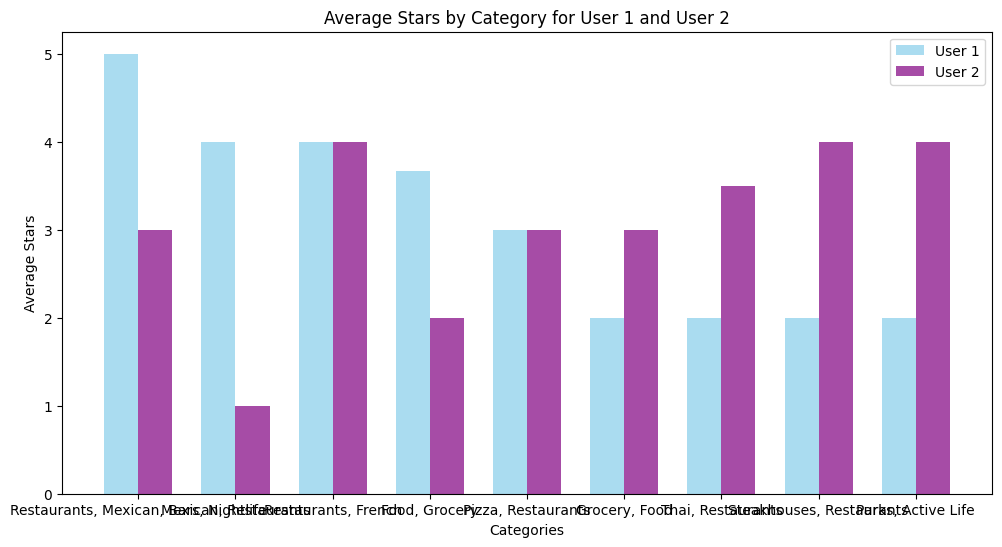

In [ ]:
# 두 데이터프레임을 하나로 병합하여 공통된 카테고리만 포함
merged_df = pd.merge(category_grouped_user1, category_grouped_user2, on='categories', suffixes=('_user1', '_user2'))

# stars 컬럼 기준으로 내림차순 정렬
merged_df = merged_df.sort_values(by='stars_user1', ascending=False)

# 바 차트 그리기
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(merged_df))

plt.bar(index, merged_df['stars_user1'], bar_width, label='User 1', color='skyblue', alpha=0.7)
plt.bar([i + bar_width for i in index], merged_df['stars_user2'], bar_width, label='User 2', color='purple', alpha=0.7)

plt.xlabel('Categories')
plt.ylabel('Average Stars')
plt.title('Average Stars by Category for User 1 and User 2')
plt.xticks([i + bar_width / 2 for i in index], merged_df['categories'])
plt.legend()
plt.show()

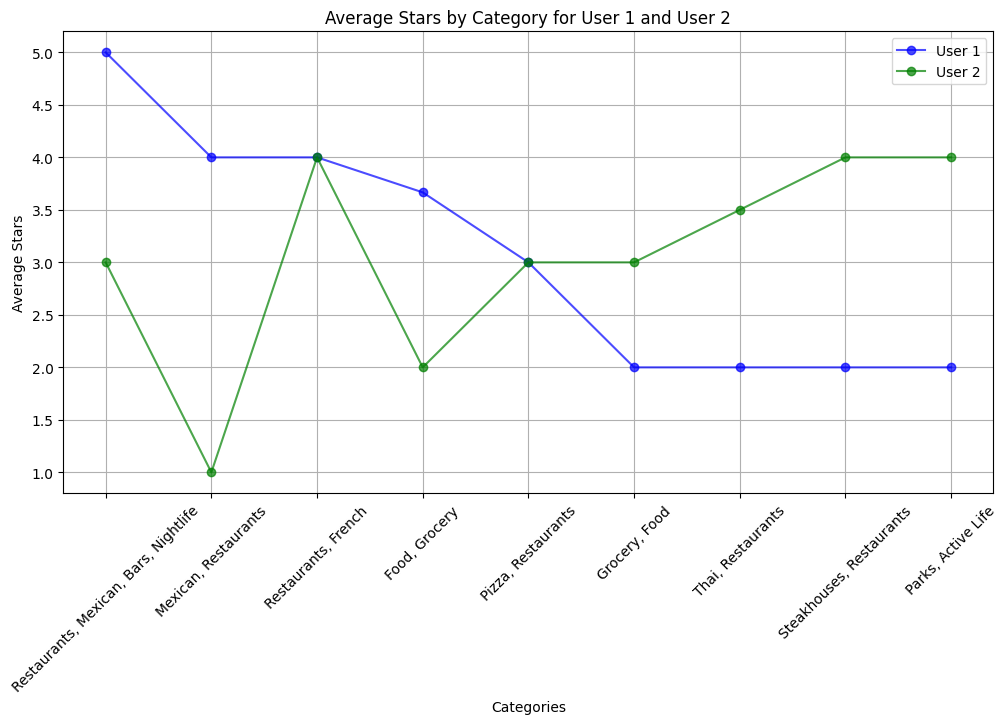

In [ ]:
# 라인 플롯 그리기
plt.figure(figsize=(12, 6))

plt.plot(merged_df['categories'], merged_df['stars_user1'], marker='o', label='User 1', color='blue', alpha=0.7)
plt.plot(merged_df['categories'], merged_df['stars_user2'], marker='o', label='User 2', color='green', alpha=0.7)

plt.xlabel('Categories')
plt.ylabel('Average Stars')
plt.title('Average Stars by Category for User 1 and User 2')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


### biz join review

#### ★ 가설. 시간의 흐름에 따라 가게의 리뷰 주요 내용이나 평점이 변할 것이다.

* ex) 맛있었던 집인데, 유명세를 타고 사람이 많아지니 맛이 변했다 등

■ 데이터셋 확인 : 리뷰가 가장 많은 가게를 확인한 결과, 실제로 년도별 편차가 심한 것을 볼 수 있었음.

▶ 해당 가게에 대한 고객들의 인식을 직관적으로 보여줄 수 있다고 생각함. 가게 사장님께 해당 가게의 성장 지표로 제공하면 좋을 것 같음.

▶ 동시에 리뷰에서 해당 기간에 가게를 대표할 수 있는 keywords를 같이 뽑아 점수와 함께 제공하면 더 구체적인 피드백이 될 수 있을 것 같음.

In [ ]:
merged_biz_rev_df = pd.merge(biz_df_pick, review_sample_df, on='business_id', how='inner')


In [ ]:
merged_biz_rev_df['business_id'].value_counts()

business_id
ac1AeYqs8Z4_e2X5M3if2A    762
_ab50qdWOk0DdB6XOrBitw    737
GXFMD0Z4jEVZBCsbPf4CTQ    639
ytynqOUb3hjKeJfRj5Tshw    559
VQcCL9PiNL_wkGf-uF3fjg    534
                         ... 
vS6opU_lGy4BaAp9gZKOdQ      1
jxfryf7DFyI5EK1mOqo9eg      1
RyhoDgzLq4BLa9cv0S-Bvw      1
fmy3OrlmargAipofB0MeoQ      1
mpf3x-BjTdTEA3yCZrAYPw      1
Name: count, Length: 112937, dtype: int64

In [ ]:
merged_biz_rev_df['business_id'].nunique()


112937

#### biz 1 : 리뷰가 가장 많은 가게

In [ ]:
biz1_timestamp = merged_biz_rev_df[merged_biz_rev_df['business_id']=='ac1AeYqs8Z4_e2X5M3if2A']

In [ ]:
biz1_timestamp

,business_id,categories,stars_biz,review_id,user_id,stars,useful,funny,cool,text,date
522041,ac1AeYqs8Z4_e2X5M3if2A,"Restaurants, Seafood, Cajun/Creole, Breakfast ...",4.0,iJWaASB6RyIHIgs8yPtTVA,6_jHwT3No2ql1CF8gf4aeg,5.0,0,0,0,Mary was the best! She suggested all the class...,2019-12-03 22:57:18
522042,ac1AeYqs8Z4_e2X5M3if2A,"Restaurants, Seafood, Cajun/Creole, Breakfast ...",4.0,OmqO7n5C_WU08VqE4pxXcA,c0cDgz0adrtHkYut1vhNhw,4.0,0,0,0,Came here during the weekend to see what the h...,2020-01-13 21:38:04
522043,ac1AeYqs8Z4_e2X5M3if2A,"Restaurants, Seafood, Cajun/Creole, Breakfast ...",4.0,4GNhn28pA7hYeZYiicdtwA,emoaueB3rQDbb25dD8-9mg,3.0,0,0,0,in a crowded place in french quarters. quite b...,2019-10-25 05:28:27
522044,ac1AeYqs8Z4_e2X5M3if2A,"Restaurants, Seafood, Cajun/Creole, Breakfast ...",4.0,e_VKDi074XEQx6MXtLGOTQ,ucZ5JvJ6b0p6jyih0baIHA,5.0,0,0,0,"Food was good, great prices. Atmosphere was ch...",2018-08-28 19:30:28
522045,ac1AeYqs8Z4_e2X5M3if2A,"Restaurants, Seafood, Cajun/Creole, Breakfast ...",4.0,YS3b1VKJSpBMzyf_zG_JFg,_NuLX-W1trzI-8ayOgFPDg,2.0,0,0,0,Huge tourist trap. If you're looking for authe...,2020-03-10 02:16:17
...,...,...,...,...,...,...,...,...,...,...,...
522798,ac1AeYqs8Z4_e2X5M3if2A,"Restaurants, Seafood, Cajun/Creole, Breakfast ...",4.0,jXkwGZ9tXEuDbfj2dzlH_Q,SphaB2YI_FSa9XQfIi6YIg,2.0,0,0,0,Food overall was good. Crab and crawfish on th...,2018-04-07 15:36:05
522799,ac1AeYqs8Z4_e2X5M3if2A,"Restaurants, Seafood, Cajun/Creole, Breakfast ...",4.0,EFCabFJkRMlHC0mJmkoAsA,EKEg8YXbGLQ4UWCx44nNaQ,5.0,0,0,0,So yummy and the staff was great! We had a lar...,2021-04-26 22:17:49
522800,ac1AeYqs8Z4_e2X5M3if2A,"Restaurants, Seafood, Cajun/Creole, Breakfast ...",4.0,2gwKOCZIMUu2uVWVXGRp_g,EP8o8JnQSI0WEkeodwA8lA,3.0,7,1,3,After watching the Kitchen Nightmare episode h...,2017-12-21 20:51:01
522801,ac1AeYqs8Z4_e2X5M3if2A,"Restaurants, Seafood, Cajun/Creole, Breakfast ...",4.0,7JPDQ2wJ2l-CuJvkmEi-Sg,Wl13ptXzES4C55q_ErmYaw,5.0,0,0,0,Best food ever ! Seafood was so fresh and tast...,2019-08-01 01:07:38


In [ ]:
# date 컬럼을 datetime 형식으로 변환
biz1_timestamp['date'] = pd.to_datetime(biz1_timestamp['date'])

# 년-월 형식으로 변환
biz1_timestamp['year_month'] = biz1_timestamp['date'].dt.to_period('M')

# 년-월 별로 그룹화하여 평균 평점 계산
monthly_avg_stars = biz1_timestamp.groupby('year_month')['stars'].mean().reset_index()

# 년 단위로 변환
biz1_timestamp['year'] = biz1_timestamp['date'].dt.to_period('Y')

# 년 단위로 그룹화하여 평균 평점 계산
yearly_avg_stars = biz1_timestamp.groupby('year')['stars'].mean().reset_index()

<ipython-input-126-a502ca55c861>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biz1_timestamp['date'] = pd.to_datetime(biz1_timestamp['date'])
<ipython-input-126-a502ca55c861>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biz1_timestamp['year_month'] = biz1_timestamp['date'].dt.to_period('M')
<ipython-input-126-a502ca55c861>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [ ]:
biz1_timestamp

,business_id,categories,stars_biz,review_id,user_id,stars,useful,funny,cool,text,date,year_month,year
522041,ac1AeYqs8Z4_e2X5M3if2A,"Restaurants, Seafood, Cajun/Creole, Breakfast ...",4.0,iJWaASB6RyIHIgs8yPtTVA,6_jHwT3No2ql1CF8gf4aeg,5.0,0,0,0,Mary was the best! She suggested all the class...,2019-12-03 22:57:18,2019-12,2019
522042,ac1AeYqs8Z4_e2X5M3if2A,"Restaurants, Seafood, Cajun/Creole, Breakfast ...",4.0,OmqO7n5C_WU08VqE4pxXcA,c0cDgz0adrtHkYut1vhNhw,4.0,0,0,0,Came here during the weekend to see what the h...,2020-01-13 21:38:04,2020-01,2020
522043,ac1AeYqs8Z4_e2X5M3if2A,"Restaurants, Seafood, Cajun/Creole, Breakfast ...",4.0,4GNhn28pA7hYeZYiicdtwA,emoaueB3rQDbb25dD8-9mg,3.0,0,0,0,in a crowded place in french quarters. quite b...,2019-10-25 05:28:27,2019-10,2019
522044,ac1AeYqs8Z4_e2X5M3if2A,"Restaurants, Seafood, Cajun/Creole, Breakfast ...",4.0,e_VKDi074XEQx6MXtLGOTQ,ucZ5JvJ6b0p6jyih0baIHA,5.0,0,0,0,"Food was good, great prices. Atmosphere was ch...",2018-08-28 19:30:28,2018-08,2018
522045,ac1AeYqs8Z4_e2X5M3if2A,"Restaurants, Seafood, Cajun/Creole, Breakfast ...",4.0,YS3b1VKJSpBMzyf_zG_JFg,_NuLX-W1trzI-8ayOgFPDg,2.0,0,0,0,Huge tourist trap. If you're looking for authe...,2020-03-10 02:16:17,2020-03,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
522798,ac1AeYqs8Z4_e2X5M3if2A,"Restaurants, Seafood, Cajun/Creole, Breakfast ...",4.0,jXkwGZ9tXEuDbfj2dzlH_Q,SphaB2YI_FSa9XQfIi6YIg,2.0,0,0,0,Food overall was good. Crab and crawfish on th...,2018-04-07 15:36:05,2018-04,2018
522799,ac1AeYqs8Z4_e2X5M3if2A,"Restaurants, Seafood, Cajun/Creole, Breakfast ...",4.0,EFCabFJkRMlHC0mJmkoAsA,EKEg8YXbGLQ4UWCx44nNaQ,5.0,0,0,0,So yummy and the staff was great! We had a lar...,2021-04-26 22:17:49,2021-04,2021
522800,ac1AeYqs8Z4_e2X5M3if2A,"Restaurants, Seafood, Cajun/Creole, Breakfast ...",4.0,2gwKOCZIMUu2uVWVXGRp_g,EP8o8JnQSI0WEkeodwA8lA,3.0,7,1,3,After watching the Kitchen Nightmare episode h...,2017-12-21 20:51:01,2017-12,2017
522801,ac1AeYqs8Z4_e2X5M3if2A,"Restaurants, Seafood, Cajun/Creole, Breakfast ...",4.0,7JPDQ2wJ2l-CuJvkmEi-Sg,Wl13ptXzES4C55q_ErmYaw,5.0,0,0,0,Best food ever ! Seafood was so fresh and tast...,2019-08-01 01:07:38,2019-08,2019


In [ ]:
# 년-월 별로 그룹화하여 평균 평점 계산
monthly_avg_stars = biz1_timestamp.groupby('year_month')['stars'].mean().reset_index()
yearly_avg_stars = biz1_timestamp.groupby('year')['stars'].mean().reset_index()

In [ ]:
monthly_avg_stars

,year_month,stars
0,2009-05,4.000000
1,2009-08,5.000000
2,2009-09,2.000000
3,2010-06,4.500000
4,2010-07,5.000000
...,...,...
121,2021-09,2.000000
122,2021-10,4.166667
123,2021-11,5.000000
124,2021-12,4.500000


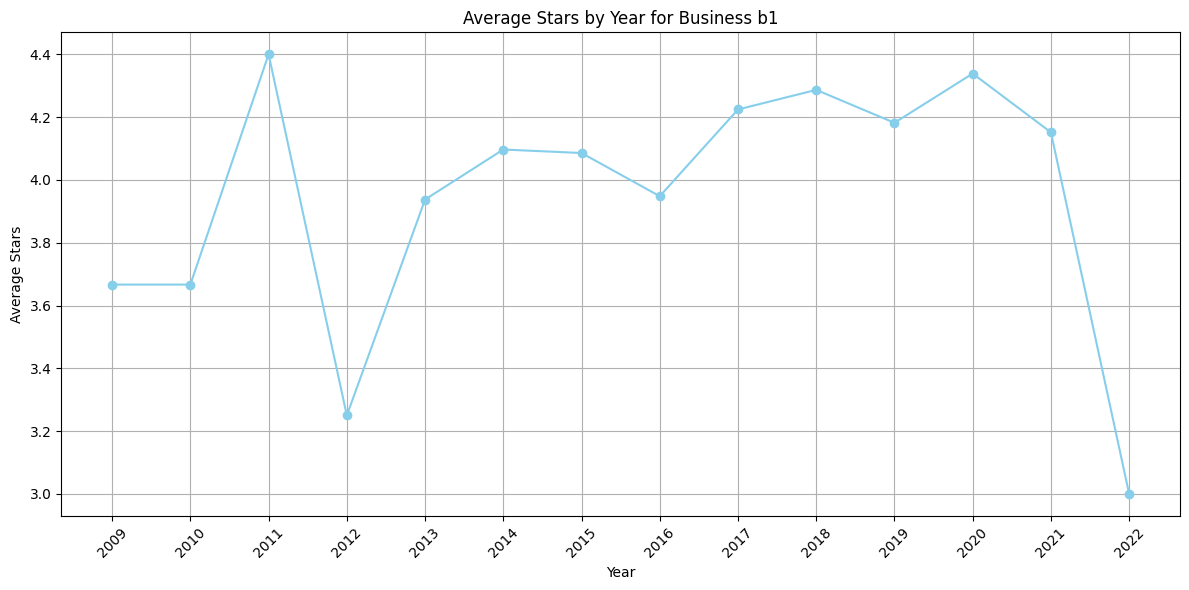

In [ ]:
# 추이 확인 시각화(연 단위)
plt.figure(figsize=(12, 6))
plt.plot(yearly_avg_stars['year'].astype(str), yearly_avg_stars['stars'], marker='o', linestyle='-', color='skyblue')

plt.xlabel('Year')
plt.ylabel('Average Stars')
plt.title('Average Stars by Year for Business b1')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#### biz 2 : 리뷰가 두번째로 많은 가게

In [ ]:
biz2_timestamp = merged_biz_rev_df[merged_biz_rev_df['business_id']=='_ab50qdWOk0DdB6XOrBitw']

In [ ]:
biz2_timestamp

,business_id,categories,stars_biz,review_id,user_id,stars,useful,funny,cool,text,date
528116,_ab50qdWOk0DdB6XOrBitw,"Live/Raw Food, Seafood, Restaurants, Cajun/Creole",4.0,sBdE0RuPyRH5D61w8fE2bw,1S5VtGcldUiZAG_SQVmNXw,3.0,0,0,0,You start out by standing on line for 30 - 60 ...,2013-10-18 22:56:31
528117,_ab50qdWOk0DdB6XOrBitw,"Live/Raw Food, Seafood, Restaurants, Cajun/Creole",4.0,dJ7NEqnFFVWjIz2VDY99xg,BZ9s2qX077wWs7HIOer5xg,4.0,2,1,2,This was our first food stop in NOLA. I was he...,2011-12-22 22:41:41
528118,_ab50qdWOk0DdB6XOrBitw,"Live/Raw Food, Seafood, Restaurants, Cajun/Creole",4.0,zEP58LJ2Mx6lsboUNBICHg,fnuVTeYhuRyxLQTOI8inFQ,5.0,0,0,0,Mmmm. I was worried this was gonna be a touris...,2018-03-24 08:42:44
528119,_ab50qdWOk0DdB6XOrBitw,"Live/Raw Food, Seafood, Restaurants, Cajun/Creole",4.0,7OPTwsTeZi8b9ePiJ59dJw,tE40WyyS341nMqJ6_ex00w,1.0,0,0,0,Over rated-poor service and questionable food ...,2016-09-22 02:50:21
528120,_ab50qdWOk0DdB6XOrBitw,"Live/Raw Food, Seafood, Restaurants, Cajun/Creole",4.0,fx6o4ObUqo00Tn-kyykZ3Q,HseeifefcBcflu25WS8Cog,1.0,0,0,0,"Overpriced, not that good and there was no soa...",2021-07-11 00:34:24
...,...,...,...,...,...,...,...,...,...,...,...
528848,_ab50qdWOk0DdB6XOrBitw,"Live/Raw Food, Seafood, Restaurants, Cajun/Creole",4.0,aIR-6qc-_dKD5Uf-xsE7-w,bbdjyLy1l7KCz4f0yGIftA,5.0,3,0,1,We came to Nola with the intention of eating o...,2018-12-27 17:36:41
528849,_ab50qdWOk0DdB6XOrBitw,"Live/Raw Food, Seafood, Restaurants, Cajun/Creole",4.0,5Mp3OSVXjT2mQYkuCO-nkA,5vWyvBQwk7gRyLr-hgQu1A,4.0,0,0,0,Line looks a lot scarier than it really is. Wa...,2015-04-01 01:27:26
528850,_ab50qdWOk0DdB6XOrBitw,"Live/Raw Food, Seafood, Restaurants, Cajun/Creole",4.0,GXHPf01CyLRfU-4sI_ataw,hm62r3r9rg7_r0ZundVdBQ,4.0,1,0,1,It was raining out but this was our to go spot...,2020-03-06 17:25:48
528851,_ab50qdWOk0DdB6XOrBitw,"Live/Raw Food, Seafood, Restaurants, Cajun/Creole",4.0,gWLiqQWybWwIZS4gT9Spbw,ryNLy69uEwBSGQfSl5ZXzg,3.0,0,0,0,Acme has a welcoming atmosphere to a city guy....,2008-09-30 15:00:00


In [ ]:
# date 컬럼을 datetime 형식으로 변환
biz2_timestamp['date'] = pd.to_datetime(biz2_timestamp['date'])

# 년-월 형식으로 변환
biz2_timestamp['year_month'] = biz2_timestamp['date'].dt.to_period('M')

# 년-월 별로 그룹화하여 평균 평점 계산
monthly_avg_stars = biz2_timestamp.groupby('year_month')['stars'].mean().reset_index()

# 년 단위로 변환
biz2_timestamp['year'] = biz2_timestamp['date'].dt.to_period('Y')

# 년 단위로 그룹화하여 평균 평점 계산
yearly_avg_stars = biz2_timestamp.groupby('year')['stars'].mean().reset_index()

<ipython-input-132-2388b15b16b4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biz2_timestamp['date'] = pd.to_datetime(biz2_timestamp['date'])
<ipython-input-132-2388b15b16b4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biz2_timestamp['year_month'] = biz2_timestamp['date'].dt.to_period('M')
<ipython-input-132-2388b15b16b4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [ ]:
# 년-월 별로 그룹화하여 평균 평점 계산
monthly_avg_stars2 = biz2_timestamp.groupby('year_month')['stars'].mean().reset_index()
yearly_avg_stars2 = biz2_timestamp.groupby('year')['stars'].mean().reset_index()

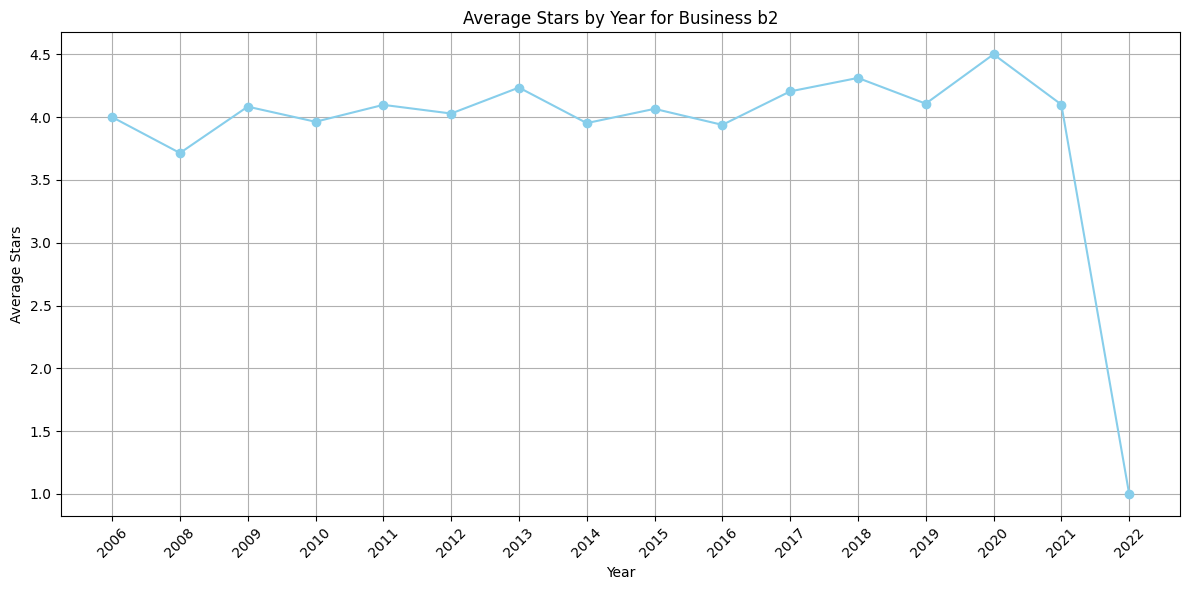

In [ ]:
# 추이 확인 시각화(연 단위)
plt.figure(figsize=(12, 6))
plt.plot(yearly_avg_stars2['year'].astype(str), yearly_avg_stars['stars'], marker='o', linestyle='-', color='skyblue')

plt.xlabel('Year')
plt.ylabel('Average Stars')
plt.title('Average Stars by Year for Business b2')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
biz2_timestamp[biz2_timestamp['year']=='2021'].value_counts()

business_id             categories                                         stars_biz  review_id               user_id                 stars  useful  funny  cool  text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

## tip df

In [ ]:
tip_df['text'].unique()

text
str
"""Guy sitting ar…"
"""Same store hou…"
"""Service was aw…"
"""Always clean a…"
"""Delish! Owner…"
"""Milkshakes are…"
"""Why are there …"
"""Free WiFi, but…"
"""Always great c…"


## checkin df

In [ ]:
checkin_df

business_id,date
str,str
"""---kPU91CF4Lq2…","""2020-03-13 21:…"
"""--0iUa4sNDFiZF…","""2010-09-13 21:…"
"""--30_8IhuyMHbS…","""2013-06-14 23:…"
"""--7PUidqRWpRSp…","""2011-02-15 17:…"
"""--7jw19RH9JKXg…","""2014-04-21 20:…"
"""--8IbOsAAxjKRo…","""2015-06-06 01:…"
"""--9osgUCSDUWUk…","""2015-06-13 02:…"
"""--ARBQr1WMsTWi…","""2014-12-12 00:…"
"""--FWWsIwxRwuw9…","""2010-09-11 16:…"
